In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [2]:
from scipy.stats import norm
import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf
from empiricaldist import Cdf

In [3]:
nsfg = pd.read_hdf("nsfg.hdf5")
nsfg[:5]

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [5]:
nsfg.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,70619.000000,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


In [6]:
pounds = nsfg["birthwgt_lb1"].value_counts().sort_index().to_frame()
pounds

,birthwgt_lb1
0.0,6
1.0,34
2.0,47
3.0,67
4.0,196
5.0,586
6.0,1666
7.0,2146
8.0,1168
9.0,363


**Replace outliers with null**

In [7]:
nsfg["birthwgt_lb1"].replace([98, 99], np.nan, inplace = True)
nsfg["birthwgt_lb1"].describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

**Simplify agecon & agepreg**

In [8]:
nsfg["agecon"] = nsfg["agecon"] / 100
nsfg["agepreg"] = nsfg["agepreg"] / 100
nsfg["pregdur"] = nsfg["agepreg"] - nsfg["agecon"]
nsfg[:5]

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,pregdur
0,60418,1,5.0,4.0,40,1.0,20.00,20.75,22.0,3554.964843,0.75
1,60418,1,4.0,12.0,36,1.0,22.91,23.58,25.0,3554.964843,0.67
2,60418,1,5.0,4.0,36,1.0,32.41,33.08,52.0,3554.964843,0.67
3,60419,6,NaN,NaN,33,NaN,36.50,NaN,NaN,2484.535358,NaN
4,60420,1,8.0,13.0,41,1.0,21.91,22.66,24.0,2903.782914,0.75


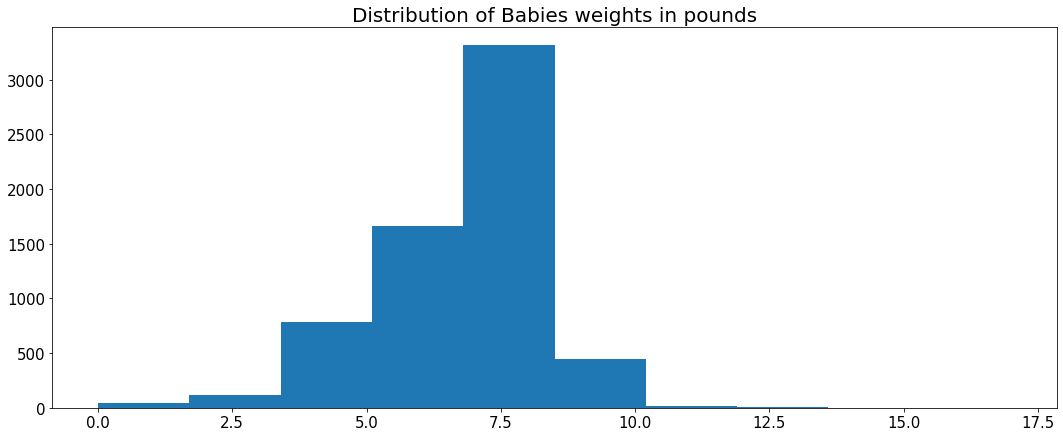

In [9]:
plt.figure(figsize = (18, 7))
plt.hist(nsfg["birthwgt_lb1"].dropna())
plt.title("Distribution of Babies weights in pounds", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)           
plt.show()

**Boolean Series**

In [10]:
# Pre Term
preterm = nsfg["prglngth"] < 37
preterm[:5]

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [11]:
sum(preterm)

3742

In [12]:
preterm.mean()

0.39987176747168196

**Filtering**

In [13]:
preterm_weight = nsfg[nsfg["prglngth"] < 37]
preterm_weight[:5]

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,pregdur
1,60418,1,4.0,12.0,36,1.0,22.91,23.58,25.0,3554.964843,0.67
2,60418,1,5.0,4.0,36,1.0,32.41,33.08,52.0,3554.964843,0.67
3,60419,6,NaN,NaN,33,NaN,36.50,NaN,NaN,2484.535358,NaN
5,60420,4,NaN,NaN,3,NaN,33.91,33.91,NaN,2903.782914,0.00
6,60423,1,5.0,0.0,35,1.0,23.66,24.33,23.0,2738.498331,0.67


In [14]:
pw = preterm_weight["birthwgt_lb1"].mean()
pw

5.173572228443449

In [15]:
fullterm_weight = nsfg[nsfg["prglngth"] > 37]
fullterm_weight["birthwgt_lb1"].mean()

6.998818665091553

**Distribution of agecon**

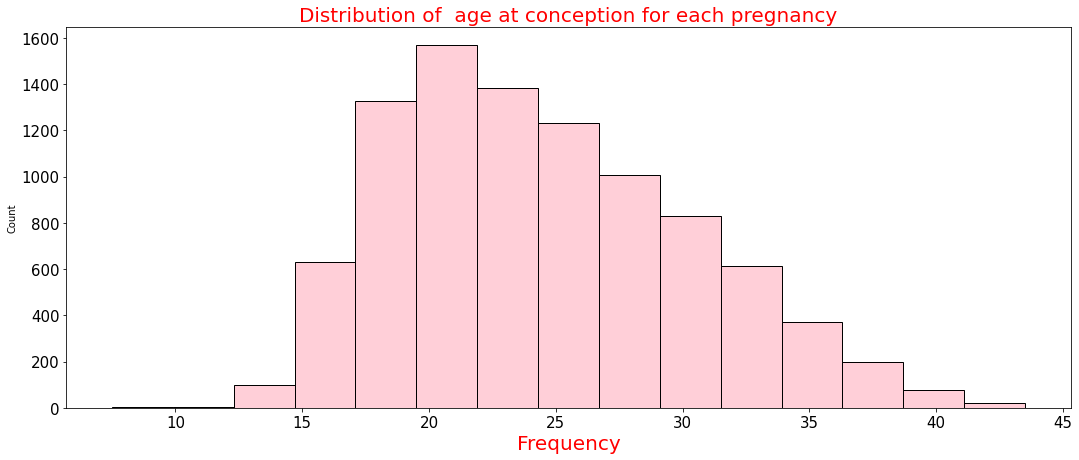

In [16]:
plt.figure(figsize = (18, 7))
sns.histplot(nsfg["agecon"], bins = 15, color = "pink")
plt.title("Distribution of  age at conception for each pregnancy", size = 20, color = "red")
plt.xlabel("Age", size = 20, color = "red")
plt.xlabel("Frequency", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Average weight of single and full term born babies**

In [17]:
single_full = nsfg[(nsfg["prglngth"] >= 37) & (nsfg["nbrnaliv"] == 1)]
print("Average weight of single and full term born babies = ", single_full["birthwgt_lb1"].mean().round(2))

Average weight of single and full term born babies =  6.96


**Average weight of multiple and full term born babies**

In [18]:
multiple_full = nsfg[(nsfg["prglngth"] >= 37) & (nsfg["nbrnaliv"] > 1)]
print("Average weight of multiple and full term born babies =", multiple_full["birthwgt_lb1"].mean().round(2))

Average weight of multiple and full term born babies = 5.36


In [19]:
gss = pd.read_hdf("gss.hdf5", "gss")
gss[:5]

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


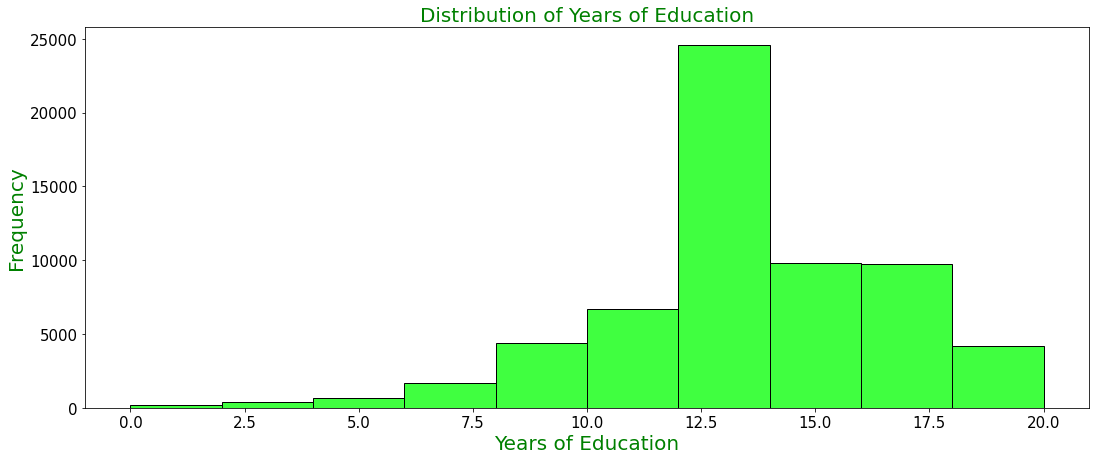

In [20]:
plt.figure(figsize = (18, 7))
sns.histplot(gss["educ"].dropna(), bins = 10, color = "lime")
plt.title("Distribution of Years of Education", size = 20, color = "green")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years of Education", size = 20, color = "green")
plt.ylabel("Frequency", size = 20, color = "green")
plt.show()

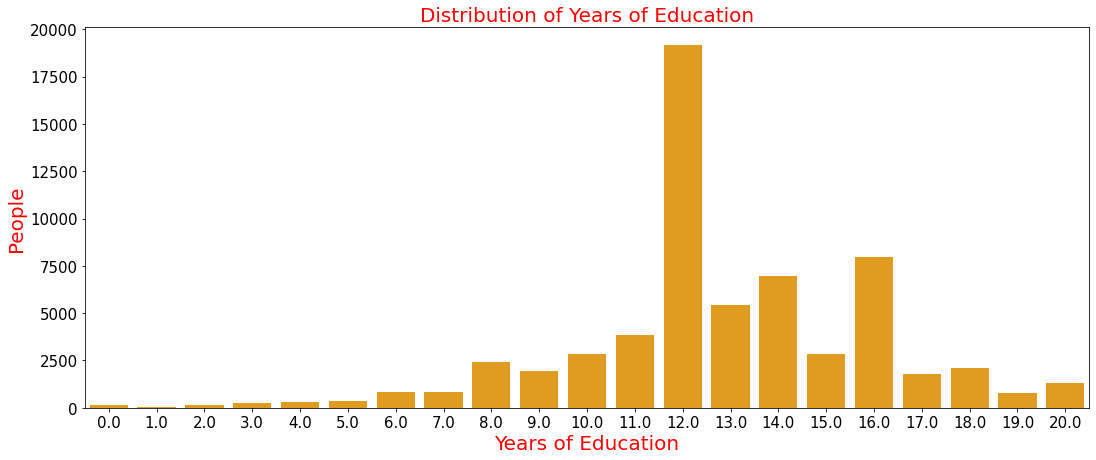

In [21]:
ed_hist = gss["educ"].value_counts().sort_index().to_frame().reset_index()
ed_hist.columns = ["education", "people"]

plt.figure(figsize = (18, 7))
sns.barplot(x = "education", y = "people", data = ed_hist, color = "orange")
plt.title("Distribution of Years of Education", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years of Education", size = 20, color = "red")
plt.ylabel("People", size = 20, color = "red")
plt.show()

### IQR Computation

In [22]:
p_25 = np.percentile(gss["realinc"].dropna(), 25)
print("25% Percentile =", p_25)

25% Percentile = 13750.0


In [23]:
p_75 = np.percentile(gss["realinc"].dropna(), 75)
print("75% Percentile =", p_75)

75% Percentile = 43426.0


In [24]:
IQR = p_75 - p_25
print("IQR =", IQR)

IQR = 29676.0


**Percentage of respondents having less than or equal to 12 years of eductaion**

In [25]:
educ_12 = gss["educ"] <= 12
print("Percentage of respondents having less than or equal to 12 years of eductaion =", educ_12.mean().round(2))

Percentage of respondents having less than or equal to 12 years of eductaion = 0.53


**Percentage of respondents who are in or complete their associate degree**

In [27]:
educ_16 = (gss["educ"] >= 14) & (gss["educ"] < 16)
print("Percentage of respondents who are in or complete their associate degree", educ_16.mean().round(2))

Percentage of respondents who are in or complete their associate degree 0.16


**Average Income by Years of Education**

In [28]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     62466 non-null  int64  
 1   age      62281 non-null  float64
 2   cohort   62282 non-null  float64
 3   sex      62466 non-null  int64  
 4   race     62466 non-null  int64  
 5   educ     62304 non-null  float64
 6   realinc  55499 non-null  float64
 7   gunlaw   40550 non-null  float64
 8   grass    36222 non-null  float64
 9   wtssall  62466 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 5.2 MB


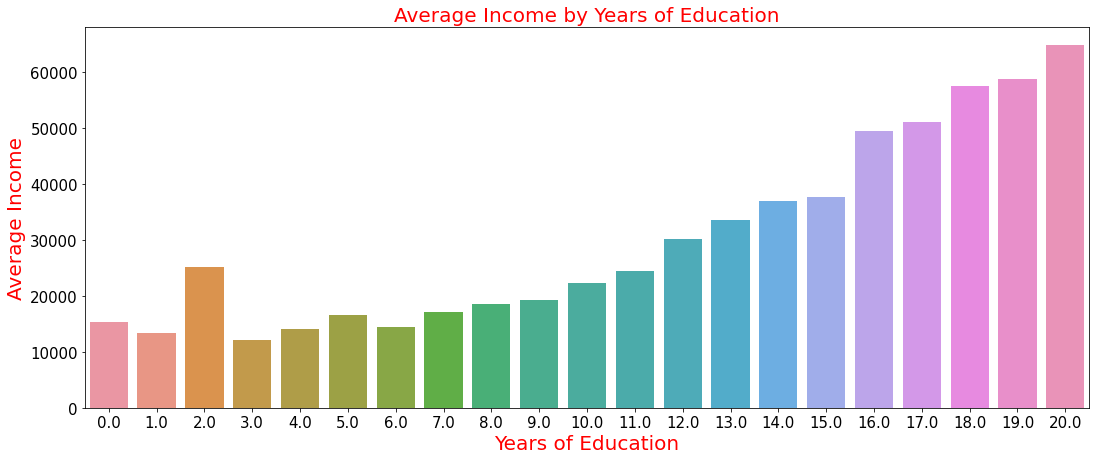

In [29]:
gss_ie = gss[["educ", "realinc"]].dropna()
ie = gss_ie.groupby("educ")["realinc"].agg(["mean"]).round(2).reset_index()
ie.columns = ["Education", "Average Income"]

plt.figure(figsize = (18, 7))
sns.barplot(x = "Education", y = "Average Income", data = ie)
plt.title("Average Income by Years of Education", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years of Education", size = 20, color = "red")
plt.ylabel("Average Income", size = 20, color = "red")
plt.show()

**Distribution of income**

In [30]:
income = gss["realinc"]

log_income = np.log10(income)

mean = np.mean(log_income)

std = np.std(log_income)

print(mean.round(2), std.round(2))

4.37 0.43


### Relationships

In [31]:
brfss = pd.read_hdf("brfss.hdf5")
brfss[:5]

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


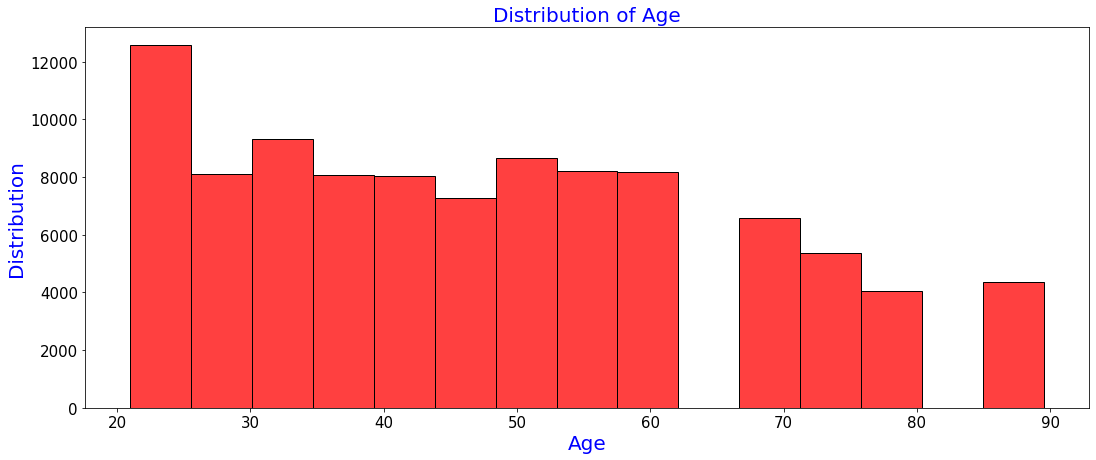

In [32]:
plt.figure(figsize = (18, 7))
sns.histplot(brfss["AGE"], bins = 15, color = "red")
plt.title("Distribution of Age", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Age", size = 20, color = "blue")
plt.ylabel("Distribution", size = 20, color = "blue")
plt.show()

**Scatter Plot**

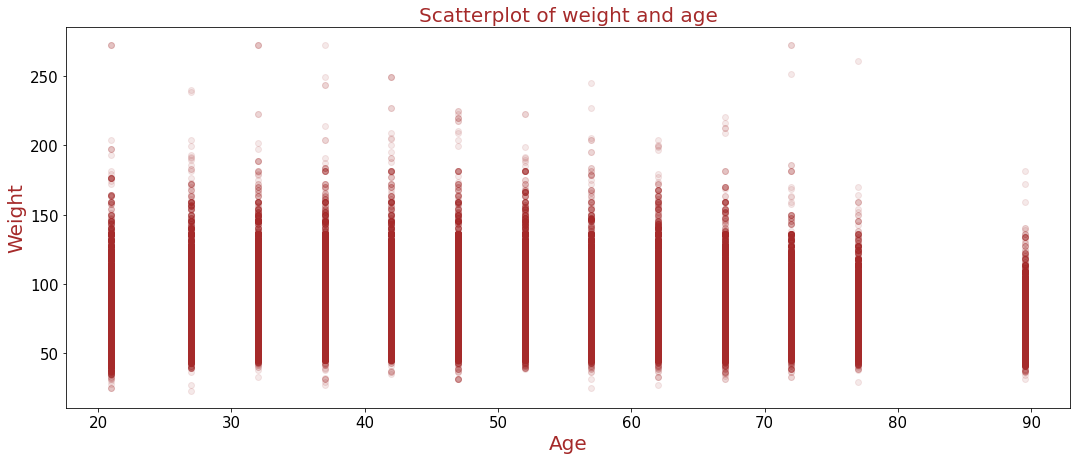

In [33]:
# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.figure(figsize = (18, 7))
plt.scatter(age, weight, alpha=0.1, color = "brown")

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.title("Scatterplot of weight and age", size = 20, color = "brown")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Age", size = 20, color = "brown")
plt.ylabel("Weight", size = 20, color = "brown")
plt.show()

**Violin Plots**

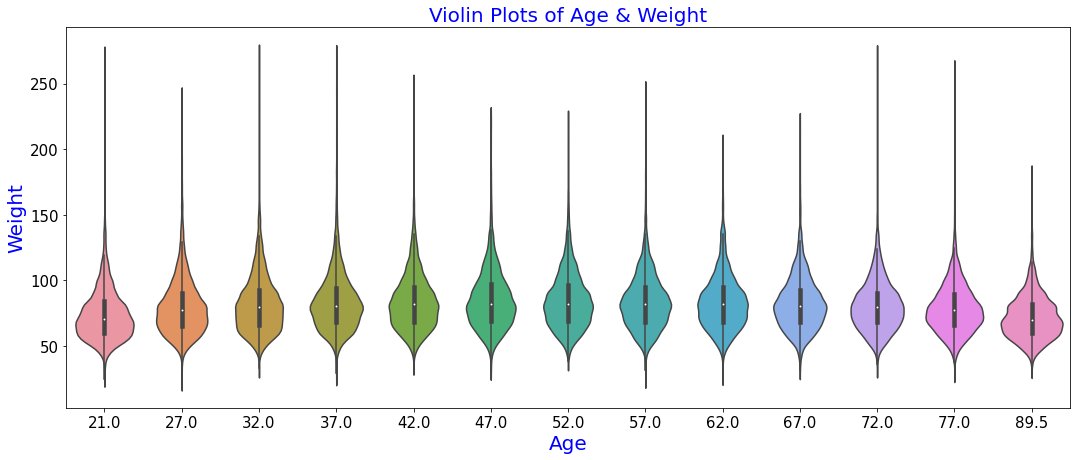

In [38]:
age_wgt = brfss.dropna(subset = ["AGE", "WTKG3"])

plt.figure(figsize = (18, 7))
sns.violinplot(x = "AGE", y = "WTKG3", data = age_wgt)
plt.title("Violin Plots of Age & Weight", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Age", size = 20, color = "blue")
plt.ylabel("Weight", size = 20, color = "blue")
plt.show()

**Boxplots**

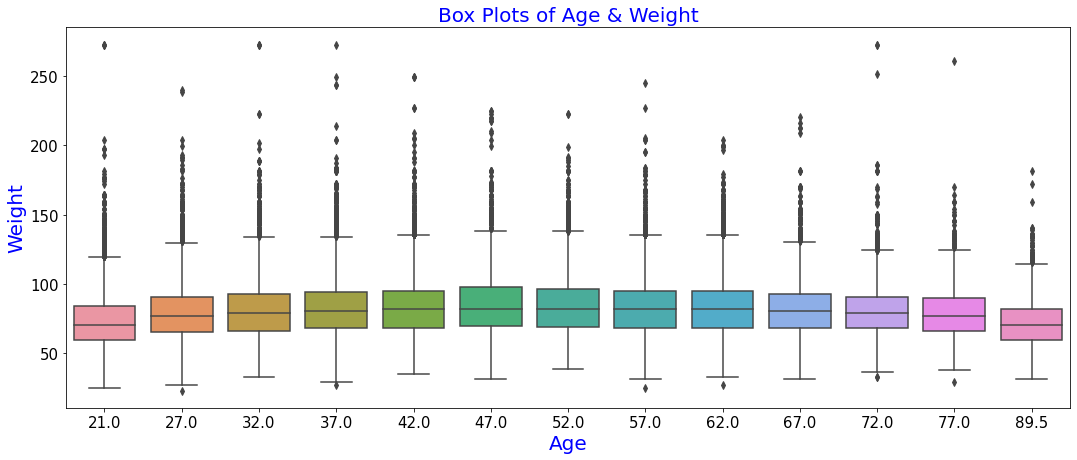

In [39]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "AGE", y = "WTKG3", data = age_wgt)
plt.title("Box Plots of Age & Weight", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Age", size = 20, color = "blue")
plt.ylabel("Weight", size = 20, color = "blue")
plt.show()